Creative Commons CC BY 4.0 Lynd Bacon & Associates, Ltd.  Not warranted to be suitable for any particular purpose. (You're on your own!)

## Preliminary Software Check-Out

Let's install some packages and load some data to see what's working.

In [1]:
# This import makes it possible for a single code cell to output
# more than one result.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Get some basic stuff
import sys
import os


This notebook should be running a Python 3 kernel.

In [2]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


Where are we?

In [3]:
os.getcwd()

'/media/sdb2/DECART2019/notebooks/day-1'

Let's import some commonly used packages:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os

# PART I - Patient Satisfaction

## First Look at Some Data: Inpatient Satisfaction with Hospital Stay

Here are some simple inpatient satisfaction data. (Anonymous, to protect the guilty.)

About a 1,800 patients recently discharged from a community hospital completed a survey soon after their discharge that asked them about experienced they had during their hospital stay.  Here we'll look at a subset of the variables on which data were collected.  They are:

* caseID - an arbitrary record identifier, or key

* q1 - overall satisfaction with hospital stay : 1 = very dissatisfied, 10 = very satisfied

The data on variables q2 through q9 were collected using a _Likert_ rating scale on which patients responded to statements about their hospital stay using:

        1 = "very strongly disagree", 10 = "very strongly agree"

* q2 - "The Doctors listened to me."
* q3 - "My Nurses listened to me."
* q4 - "I was able to get enough rest during my stay."
* q5 - "My room was clean."
* q6 - "Checking in to the hospital was easy."
* q7 - "Checking out of the hospital was easy."
* q8 - "What I needed to sign while at the hospital was explained clearly to me." 
* q9 - "Getting to the hospital was convenient for me."
  <br><br>
* ptCat - Three categories of inpatient based on the type of admitting service:

        0 = Med, 1 = Surg, 2 = Concierge (special, "premium" team care)

Now, we'll import the data from the file `DECART-patSat.csv`.  We'll assume that it's in the DATA subdir below the current wd:

In [3]:
psData=pd.read_csv('DATA/ML/DECART-patSat.csv')

Let's take a peek at the data:

In [6]:
psData.describe().round(2) # Desc stats
psData.shape  #rows, columns
psData.columns # DataFrame col names

,caseID,patSat,q2,q3,q4,q5,q6,q7,q8,q9,ptCat
count,1811.00,1811.00,1811.00,1811.00,1811.00,1811.00,1811.00,1811.00,1811.00,1811.00,1811.00
mean,905.00,6.07,5.88,6.27,6.14,6.06,7.25,7.46,7.89,7.77,0.97
std,522.93,2.55,2.65,2.66,2.62,2.55,2.42,2.28,2.14,2.21,0.79
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,452.50,5.00,4.00,5.00,5.00,5.00,5.00,6.00,7.00,7.00,0.00
50%,905.00,6.00,6.00,7.00,6.00,6.00,8.00,8.00,8.00,8.00,1.00
75%,1357.50,8.00,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.00,2.00
max,1810.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,2.00


(1811, 11)

Index(['caseID', 'patSat', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
       'ptCat'],
      dtype='object')

Get a scatterplot of `patSat` vs. `q9`:

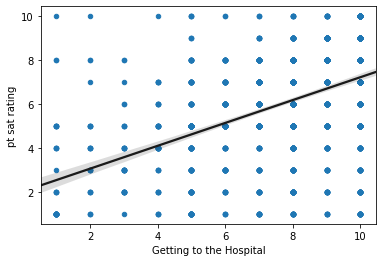

In [7]:
points = plt.scatter(psData.q9,psData.patSat,s=20) 

#build the plot
plot = sns.regplot("q9", "patSat", data=psData, scatter=False, color=".1")
plot = plot.set(ylabel='pt sat rating', xlabel='Getting to the Hospital')

Kind of ugly, and pretty useless, no?  Because the rating scales limit the numeric values that are possible, the "density" of the data is a little hard to perceive.  One solution is to add a little "noise," or "jitter," to the data, to make the data values easier to perceive. Here's some slightly modified code from [Stack Overflow](ttps://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot). The `jitter` function substitutes for `scatter`. Tweak it as needed.

In [8]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None,
           vmax=None, alpha=None, linewidths=None, verts=None,  
           **kwargs):
                return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, 
                               marker=marker, cmap=cmap, norm=norm, 
                               vmin=vmin, vmax=vmax, alpha=alpha, 
                               linewidths=linewidths, verts=verts, 
                                **kwargs)

Let's plot again, using the jittered data points.

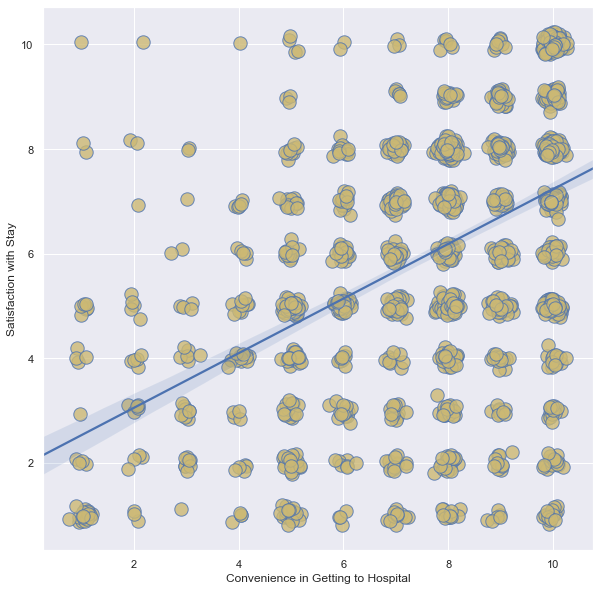

In [9]:
sns.set(rc={'figure.figsize':(10,10)})

points=jitter(psData.q9,psData.patSat,s=180,alpha=0.8,c='y',
            edgecolors='b')  

plot = sns.regplot("q9", "patSat", data=psData, scatter=False)
plot = plot.set(ylabel='Satisfaction with Stay', 
                xlabel='Convenience in Getting to Hospital',aspect=1)

# PART 2 Some Radon Data (A "UDU 4U")

Now let's import some data from the file `radon.csv` as a Pandas DataFrame we'll call `radon`. 

In [10]:
# This assumes the file radon.csv is in your pwd.  Check with os.getcwd()

radon=pd.read_csv('DATA/radon.csv')

Next, summarize the variables in this DataFrame using `.describe()`.

In [13]:
# Your code for summarizing the data values goes here.

Next task:  Estimate the (linear) correlation coefficient between `lcanmort` and `lnradon`. The Pearson coefficient will suffice.  You can use the method in `Pandas`, or use the `.corrcoef()` method in `numpy`.  Actually, let's try both of them.

In [2]:
# Your code for calculating the correlation coefficient goes here.
# For starters, using Pandas:

# radon.lcanmort.corr(radon.lnradon)

# Using numpy,

# np.corrcoef(??,??)[0,1]  # Fill in the ??'s with col names in the radon DataFrame.
# There's a Pandas "trick" to do, here.

Is the coefficient estimate surprising to you? Do a scatter plot that shows how `lcanmort` varies with `lnradon.` Include a regression line to summarize how the two variables covary.

In [15]:
# Your scatter plot code goes here

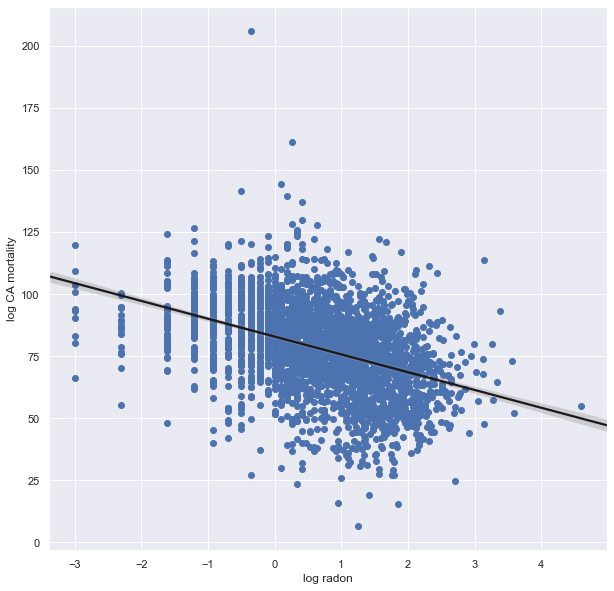

In [16]:
# points=plt.scatter(radon.lnradon,radon.lcanmort)


# plot=sns.regplot('lnradon','lcanmort',data=radon,scatter=False,color='.1')
# plot=plot.set(xlabel='what?',ylabel='who')  # Replace the axis label values.

See anything peculiar?  Let's try "conditioning on another variable, say, `cursmoke`. The values of `cursmoke` will be mapped to a "rainbow" spectrum.  You can change the mapping if you want.  See [matplotlib colormaps](https://matplotlib.org/users/colormaps.html) .

In [24]:
# points=plt.scatter(radon.lnradon,radon.lcanmort,c=radon.cursmoke,
#                  cmap="rainbow")

#plt.colorbar(points)

# plot=sns.regplot('??','??',data=radon,scatter=False, # Replace the ??
#                scatter_kws={'alpha':0.1},color='.1')
# plot=plot.set(xlabel='log radon',ylabel='log CA mortality')